# Project: Wrangling and Analyzing Data
BY : DAVID KAYODE OLUWADARE

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
pwd

'/home/workspace'

In [2]:
ls

act_report.ipynb       __pycache__/     twitter-archive-enhanced.csv
image-predictions.tsv  tweet_json.txt   wrangle_act.ipynb
mytest.py              twitter_api.csv  wrangle_report.ipynb


In [3]:
# Import libraries

import requests
import pandas as pd

print("Setup Complete")

Setup Complete


In [4]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [5]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
#importing where the Tokens gotten from twitter developer portal are saved
import mytest

In [7]:
#mytest.consumer_key

In [8]:
!pip3 install tweepy

In [9]:
#import libraries
import tweepy
from tweepy import OAuthHandler 
from timeit import default_timer as timer
import json
print("Setup Complete")

Setup Complete


In [13]:
#Twitter Tokens, secret and key generated from the developer portal

consumer_key = mytest.consumer_key
consumer_secret = mytest.consumer_secret
access_token = mytest.access_token
access_secret = mytest.access_secret

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [10]:
# convert the tweet_id in the twitter-archive-enhanced.csv file to a list
# and also count it

tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [14]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print(tweet_id,":", str(e))
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

888202515573088257 : [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 : [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 : [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 : [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 : [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 : [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 : [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 : [{'code': 144, 'message': 'No status found with that ID.'}]
856330835276025856 : [{'code': 34, 'message': 'Sorry, that page does not exist.'}]
851953902622658560 : [{'code': 144, 'message': 'No status found with that ID.'}]
851861385021730816 : [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 : [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 : [{'co

In [18]:
#Extracting the file by creating an empty list to store them
datafromAPI = []
#Read the created 'tweet_json.txt' line by line and extract needed data 
with open('tweet_json.txt', 'r') as file:
    lines = file.readlines()
    
#looping through the reading text file
    for everyline in lines:
        everyline_json = json.loads(everyline)
        id = everyline_json['id']
        favorite_count = everyline_json['favorite_count']
        retweet = everyline_json['retweet_count']
        datafromAPI.append({'tweet_id':id,
                            'favorite_count':favorite_count,
                            'retweet_count':retweet})

In [20]:
ls

act_report.ipynb       __pycache__/     twitter-archive-enhanced.csv
image-predictions.tsv  tweet_json.txt   wrangle_act.ipynb
mytest.py              twitter_api.csv  wrangle_report.ipynb


In [21]:
#converting the above read text file as a dictonary to dataframe as instructed
df = pd.DataFrame(datafromAPI, columns = ['tweet_id','favorite_count','retweet_count'])
df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33819,7009
1,892177421306343426,29322,5302
2,891815181378084864,22060,3481
3,891689557279858688,36946,7227
4,891327558926688256,35314,7763


In [22]:
df.shape

(2327, 3)

In [23]:
#save and read datafromAPI CSV

df.to_csv('twitter_api.csv', index =False)
apiData = pd.read_csv('twitter_api.csv')

## Assessing Data

### Visual assessment


In [24]:
twitter_archive.sample(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1987,672877615439593473,NaN,NaN,2015-12-04 20:38:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oscar. He's getting bombarded with the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672877615...,8,10,Oscar,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2186,668981893510119424,NaN,NaN,2015-11-24 02:38:07 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unique dog here. Oddly shaped tail. Long pink ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668981893...,4,10,None,None,None,None,None


In [25]:
image_prediction = pd.read_csv('image-predictions.tsv', sep ='\t')
image_prediction.sample(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
829,693622659251335168,https://pbs.twimg.com/media/CaA-IR9VIAAqg5l.jpg,1,malamute,0.449298,True,Siberian_husky,0.385075,True,Eskimo_dog,0.163485,True
1881,847116187444137987,https://pbs.twimg.com/media/C8GPrNDW4AAkLde.jpg,1,white_wolf,0.128935,False,American_Staffordshire_terrier,0.113434,True,dingo,0.081231,False
1458,777885040357281792,https://pbs.twimg.com/media/CsuaUH2WAAAWJh1.jpg,1,Afghan_hound,0.123529,True,basset,0.119682,True,Siberian_husky,0.108709,True


In [26]:
apiData.head(10)

,tweet_id,favorite_count,retweet_count
0,892420643555336193,33819,7009
1,892177421306343426,29322,5302
2,891815181378084864,22060,3481
3,891689557279858688,36946,7227
4,891327558926688256,35314,7763
5,891087950875897856,17796,2599
6,890971913173991426,10369,1664
7,890729181411237888,56880,15757
8,890609185150312448,24529,3622
9,890240255349198849,27965,6101


In [27]:
apiData.shape

(2327, 3)

### Programatical Assessment
After assessing visually the three datasets and identifying several tidiness issues, we now go deeper using Programatic Assessment:

In [37]:
apiData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [38]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [39]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [40]:
# Test if the missing expanded URLs are a problem.
# If there is a link in the tweet's text and no expanded URL then there is an issue

nullvalues = twitter_archive[twitter_archive['expanded_urls'].isnull()]
nullvalues['text'].str.contains('http').sum()

0

In [41]:
# check for duplicated IDs in the feeds dataframe

twitter_archive[twitter_archive.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality issues
1. The column 'id' should be changed to tweet_id in the *newapi* Table 

2. Some uppercase and lowercase letters identified in columns 'p1', 'p2', and 'p3' in the *image_prediction* Table

3. 'text' column has unnecesary HTML code in the *twitter_archive* Table

4. Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,      retweeted_status_timestamp, and expanded_urls in the *twitter_archive* Table

5. 'timestamp' should be a datetime64 dtype as well in the *Twitter_archive* Table 

6. Remove the 'source' column in the *twitter_archive* Table

7. Drops rows with duplicates in the jpg_url column

8. Change timestamp format from "2017-07-26 15:59:51+00:00" to "2017, 2016, 2015...."

### Tidiness issues
1. Merged all three tables into one.

2. Dog tests are spread in three columns.

## Cleaning Data

Before we go any further, we need to make copies of the data. Here the data frame is still the same but from the #QUALITY ISSUE : clean_newapi is the same as newapi, clean_image is the same as image_prediction, clean_tweet is the same as twitter_archive respectively below

In [79]:
# Make copies of original pieces of data

clean_newapi = apiData.copy()
clean_image = image_prediction.copy()
clean_tweet = twitter_archive.copy()

### Quality issues

### Issue #1: 1.The column 'id' should be changed to tweet_id in the newapi Table

#### Define: The column 'id' should be changed to tweet_id in the *newapi* Table 

#### Code

In [80]:
clean_newapi = clean_newapi.rename(columns = {'id':'tweet_id'})

#### Test

In [81]:
#Use the .sample() method to output the columns and five random samples

clean_newapi.sample(5)

,tweet_id,favorite_count,retweet_count
446,817415592588222464,5300,890
124,867421006826221569,14338,2118
1781,676821958043033607,20754,13808
2251,667393430834667520,168,50
1140,721001180231503872,2351,552


### Issue #2: The names of dogs in columns p1, p2, and p3 have some uppercase and lowercase letters in the image_prediction Table

#### Define: Using the .lower() to changes all series to lower case letters which is also a string, passing .str would do the job.

#### Code

In [82]:
clean_image['p1'] = clean_image['p1'].str.lower()
clean_image['p2'] = clean_image['p2'].str.lower()
clean_image['p3'] = clean_image['p3'].str.lower()

#### Test

In [83]:
clean_image.sample(7)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1667,812781120811126785,https://pbs.twimg.com/media/C0eUHfWUAAANEYr.jpg,1,bull_mastiff,0.989316,True,boxer,0.007043,True,french_bulldog,0.001740,True
1085,718613305783398402,https://pbs.twimg.com/media/CfkG_PMWsAAH0MZ.jpg,1,labrador_retriever,0.584580,True,german_short-haired_pointer,0.340657,True,chesapeake_bay_retriever,0.031975,True
1929,858471635011153920,https://pbs.twimg.com/media/C-nnZBdXkAAB-wg.jpg,1,pembroke,0.987407,True,cardigan,0.008723,True,basenji,0.003424,True
1399,768596291618299904,https://pbs.twimg.com/media/CqqaPjqWIAAOyNL.jpg,1,great_pyrenees,0.729745,True,golden_retriever,0.237961,True,labrador_retriever,0.020903,True
1006,709158332880297985,https://pbs.twimg.com/media/CddvvSwWoAUObQw.jpg,1,siberian_husky,0.212957,True,eskimo_dog,0.178887,True,labrador_retriever,0.174218,True
242,670449342516494336,https://pbs.twimg.com/media/CU3qHNTWsAApGr0.jpg,1,peacock,0.999924,False,european_gallinule,0.000030,False,agama,0.000022,False
156,668826086256599040,https://pbs.twimg.com/media/CUglxbFXAAA5O0d.jpg,1,malinois,0.640185,True,irish_terrier,0.153700,True,rhodesian_ridgeback,0.068457,True


### Issue #3: text column has unnecesary HTML code in the twitter_archive Table

#### Define: Change the html ampersand code from "&amp ;" to "&" in the text column, Remove the "/n " the newline symbol, Remove ending url link.

#### Code

In [84]:
# Check header

clean_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [85]:
# Check unique texts

clean_tweet['text'].unique()

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj'], dtype=object)

In [86]:

clean_tweet['text'] = clean_tweet.text.str.replace("&amp ;", "&")
clean_tweet['text'] = clean_tweet.text.str.replace("/n ", ' ')
clean_tweet['text'] = clean_tweet.text.str.rstrip()
clean_tweet['text'] = clean_tweet.text.str.replace(r"http\S+", "")

#### Test

In [87]:
# Check unique texts again

clean_tweet.text.unique()

array([ "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 ",
       "This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 ",
       'This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 ',
       ...,
       'Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af ',
       'This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of ',
       'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet '], dtype=object)

### Issue #4: Missing values in columns: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, and expanded_urls in the twitter_archive Table

#### Define: The columns having missing values (Nan) would be droped with the .dropna() function.


#### Code

In [88]:
clean_tweet = clean_tweet.drop(columns=["in_reply_to_status_id",
                                    "in_reply_to_user_id",
                                    "retweeted_status_id",
                                    "retweeted_status_user_id",
                                   "retweeted_status_timestamp"], axis=1)


#### Test

In [89]:
# Check information of the dataframe

clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null object
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: int64(3), object(9)
memory usage: 221.0+ KB


### Issue #5: 'timestamp' should be a datetime64 dtype type as well in the Twitter_archive Table

#### Define: Using the pandas .to_datetime to convert the 'timestamp' to a datetime64[ns, UTC]

#### Code

In [90]:
clean_tweet['timestamp'] = pd.to_datetime(clean_tweet['timestamp'])


#### Test

In [91]:
clean_tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
source                2356 non-null object
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
dtypes: datetime64[ns](1), int64(3), object(8)
memory usage: 221.0+ KB


### Issue #6: Remove the source column in the twitter_archive Table

#### Define: Drop the column source with the .drop() Method

#### Code

In [92]:
clean_tweet.drop(columns='source', axis = 1 , inplace =True)

#### Test

In [93]:
clean_tweet.head(3)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


### Issue #7: Drops rows with duplicates in the jpg_url column

#### Define: Using the drop_duplicates() method to drop duplicates

#### Code

In [94]:
#Check duplicates

clean_image.jpg_url.duplicated().sum()

66

In [95]:
# drop duplicated rows

clean_image = clean_image.drop_duplicates('jpg_url')

#### Test

In [96]:
clean_image.jpg_url.duplicated().sum()

0

### Issue #8: Change timestamp format from "2017-07-26 15:59:51+00:00" to "2017, 2016, 2015....""

#### Define: Creating a new colum year and use the to convert the pd.DatetimeIndex().year

#### Code

In [97]:
clean_tweet['year'] = pd.DatetimeIndex(clean_tweet['timestamp']).year


#### Test

In [98]:
clean_tweet.year.unique()

array([2017, 2016, 2015])

### Tidiness 

### Issue #1: Merge all three tables into one.

#### Define:

#### Code

In [100]:
# Bring out the unique names

clean_tweet.name.sort_values().unique()

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber', 'Ambrose',
       'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel', 'Anna',
       'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen', 'Arlo',
       'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh', 'Aspen',
       'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn', 'Ava',
       'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo', 'Barclay',
       'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter', 'Bayley',
       'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo', 'Bell',
       'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny', 'Bentley',
       'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson', 'Betty', 'Beya',
       'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky', 'Birf', 'Bisquick',
       'Blakely', 'Blanket', 'Blipson', 'Blitz', 'Bloo', 'Bloop', 'Blu',

In [101]:
# Import the numpy library
import numpy as np

#Use the replace() method to replace the dogs with unofficial names to no-name
clean_tweet.name.replace(['such', 'an', 'the', 'just', 'by', 'a', 'mad', 'old', 'space', 
             'quite', 'actually', 'infuriating', 'all', 'officially', 'my', 'unacceptable', 'incredibly',
              'not', '0', 'life', 'one', 'his', 'very','this','None'], 'no-name', inplace=True)

In [102]:
clean_tweet.name.sort_values().value_counts()

no-name     851
Charlie      12
Cooper       11
Oliver       11
Lucy         11
Tucker       10
Lola         10
Penny        10
Winston       9
Bo            9
Sadie         8
Buddy         7
Toby          7
Bailey        7
Daisy         7
Koda          6
Oscar         6
Jack          6
Milo          6
Bella         6
Dave          6
Rusty         6
Scout         6
Stanley       6
Jax           6
Leo           6
Oakley        5
Bentley       5
Alfie         5
Finn          5
           ... 
Brutus        1
Sonny         1
Liam          1
Napolean      1
Hermione      1
Randall       1
Gilbert       1
Dante         1
Tripp         1
General       1
Mac           1
Georgie       1
Willow        1
Severus       1
Travis        1
Raphael       1
Obi           1
Steve         1
Cannon        1
Howie         1
Ed            1
Aubie         1
Al            1
Rufio         1
Gustav        1
Sephie        1
Cilantro      1
Harlso        1
Chevy         1
Huck          1
Name: name, Length: 934,

In [103]:
#Drop the 'None' rows

clean_tweet.drop(clean_tweet.query('(name == "None")').index ,inplace=True)
clean_tweet.head(2)

,tweet_id,timestamp,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,year
0,892420643555336193,2017-08-01 16:23:56,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017
1,892177421306343426,2017-08-01 00:17:27,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017


In [104]:
# Check informations of the columns to be merged

clean_newapi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2327 entries, 0 to 2326
Data columns (total 3 columns):
tweet_id          2327 non-null int64
favorite_count    2327 non-null int64
retweet_count     2327 non-null int64
dtypes: int64(3)
memory usage: 54.6 KB


In [105]:
# Merge clean_tweet, and clean_newapi using 'tweet_id' they have in common

combined = pd.merge(clean_tweet, clean_newapi, on = "tweet_id", how="left")
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id              2356 non-null int64
timestamp             2356 non-null datetime64[ns]
text                  2356 non-null object
expanded_urls         2297 non-null object
rating_numerator      2356 non-null int64
rating_denominator    2356 non-null int64
name                  2356 non-null object
doggo                 2356 non-null object
floofer               2356 non-null object
pupper                2356 non-null object
puppo                 2356 non-null object
year                  2356 non-null int64
favorite_count        2327 non-null float64
retweet_count         2327 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(4), object(7)
memory usage: 276.1+ KB


In [106]:
# Merge the combined and clean_image into a single data frame

combined_archive = pd.merge(combined, clean_image, on='tweet_id', how ='inner')
combined_archive.columns

Index(['tweet_id', 'timestamp', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'year', 'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog'],
      dtype='object')

#### Test

In [107]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2008
Data columns (total 25 columns):
tweet_id              2009 non-null int64
timestamp             2009 non-null datetime64[ns]
text                  2009 non-null object
expanded_urls         2009 non-null object
rating_numerator      2009 non-null int64
rating_denominator    2009 non-null int64
name                  2009 non-null object
doggo                 2009 non-null object
floofer               2009 non-null object
pupper                2009 non-null object
puppo                 2009 non-null object
year                  2009 non-null int64
favorite_count        1998 non-null float64
retweet_count         1998 non-null float64
jpg_url               2009 non-null object
img_num               2009 non-null int64
p1                    2009 non-null object
p1_conf               2009 non-null float64
p1_dog                2009 non-null bool
p2                    2009 non-null object
p2_conf               2009 no

In [108]:
combined_archive.shape

(2009, 25)

### Issue #2: Dog tests are spread in three columns.

#### Define: Melt the dog names in one single series; value_name='dogtypes'

#### Code

In [109]:
combined_archive = pd.melt(combined_archive, id_vars=['tweet_id','timestamp', 'text','expanded_urls',
                                                      'rating_numerator','rating_denominator','name',
                                                      'favorite_count', 'retweet_count', 'jpg_url',
                                                      'img_num', 'p1','p1_conf','p1_dog', 'p2', 'p2_conf',
                                                      'p2_dog', 'p3', 'p3_conf','p3_dog'], value_name='dogtypes')

#### Test

In [110]:
combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10045 entries, 0 to 10044
Data columns (total 22 columns):
tweet_id              10045 non-null int64
timestamp             10045 non-null datetime64[ns]
text                  10045 non-null object
expanded_urls         10045 non-null object
rating_numerator      10045 non-null int64
rating_denominator    10045 non-null int64
name                  10045 non-null object
favorite_count        9990 non-null float64
retweet_count         9990 non-null float64
jpg_url               10045 non-null object
img_num               10045 non-null int64
p1                    10045 non-null object
p1_conf               10045 non-null float64
p1_dog                10045 non-null bool
p2                    10045 non-null object
p2_conf               10045 non-null float64
p2_dog                10045 non-null bool
p3                    10045 non-null object
p3_conf               10045 non-null float64
p3_dog                10045 non-null bool
variable  

In [111]:
combined_archive =  combined_archive.drop_duplicates()

In [112]:
# Drop name dog with no name

combined_archive.drop(combined_archive.query('(name == "no-name")').index ,inplace=True)

In [113]:
# Check

combined_archive.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6765 entries, 0 to 10014
Data columns (total 22 columns):
tweet_id              6765 non-null int64
timestamp             6765 non-null datetime64[ns]
text                  6765 non-null object
expanded_urls         6765 non-null object
rating_numerator      6765 non-null int64
rating_denominator    6765 non-null int64
name                  6765 non-null object
favorite_count        6730 non-null float64
retweet_count         6730 non-null float64
jpg_url               6765 non-null object
img_num               6765 non-null int64
p1                    6765 non-null object
p1_conf               6765 non-null float64
p1_dog                6765 non-null bool
p2                    6765 non-null object
p2_conf               6765 non-null float64
p2_dog                6765 non-null bool
p3                    6765 non-null object
p3_conf               6765 non-null float64
p3_dog                6765 non-null bool
variable              6765 no

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [115]:
combined_archive.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

### Insights:
1. DOG CATEGORIES WITH FAVOURITE COUNTS
2. DOG WITH THE MOST POPULAR NAME
3. TOP 20 DOG NAMES WITH RETWEETS RATE
4. DOG BREED WITH HIGHEST MEAN RATE NUMERATOR, AND HIGHEST VALUE COUNTS


### INSIGHT 1

DOG CATEGORIES WITH FAVOURITE COUNTS

In [117]:
 combined_archive.dogtypes.unique()

array(['None', 'doggo', 'floofer', 'pupper', 'puppo', 2017, 2016, 2015], dtype=object)

In [119]:
# Drop duplicates with dogtypes "None,2017,2016,2015" 

combined_archive.drop(combined_archive.query('(dogtypes == "None")').index ,inplace=True)

In [125]:
combined_archive.drop(combined_archive.query('(dogtypes == 2017)').index ,inplace=True)

In [127]:
combined_archive.drop(combined_archive.query('(dogtypes == 2016)').index ,inplace=True)

In [128]:
combined_archive.drop(combined_archive.query('(dogtypes == 2015)').index ,inplace=True)

In [129]:
 combined_archive.dogtypes.unique()

array(['doggo', 'floofer', 'pupper', 'puppo'], dtype=object)

In [148]:
!pip install seaborn

In [149]:
# Import visual libraries

import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

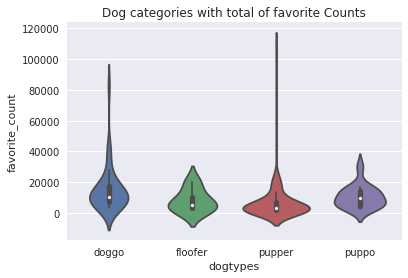

In [150]:
# Plot Dogtypes with favourite count  hue="species"

sns.violinplot(data=combined_archive,x="dogtypes", y="favorite_count")
plt.title('Dog categories with total of favorite Counts');

In [152]:
#Test

combined_archive.dogtypes.value_counts()

pupper     121
doggo       40
puppo       15
floofer      5
Name: dogtypes, dtype: int64

In the part above, i found out, the category which is recorded the highest rate of favourites, after removing None values, and visualizing the chart, the pupper dog (216 count points) recorded the highest rate, then doggo, floofer, and pupper.

### INSIGHT 2

DOG WITH THE MOST POPULAR NAME

In [153]:
# Check value couunt

combined_archive.name.value_counts()

Cooper      3
Pickles     2
Sampson     2
Pinot       2
Milo        2
Dido        2
Maggie      2
Chuckles    2
Gus         2
Bones       2
Oliver      2
Bo          2
Loki        2
Kawhi       1
Smiley      1
Doobert     1
Winston     1
Betty       1
Gerbald     1
Benji       1
Moose       1
Lily        1
Deacon      1
Ollie       1
Sunny       1
Mimosa      1
Rooney      1
Craig       1
Lenox       1
Doc         1
           ..
Pilot       1
Raymond     1
Bayley      1
Jamesy      1
Petrick     1
Albert      1
Meera       1
Rhino       1
Rover       1
Scooter     1
Blu         1
Gidget      1
Shikha      1
Lorenzo     1
Huck        1
Scott       1
Bella       1
Chet        1
Kellogg     1
Miguel      1
Astrid      1
Napolean    1
Jazz        1
Kyle        1
Divine      1
Snoopy      1
Kaiya       1
Rocky       1
Eve         1
Stuart      1
Name: name, Length: 167, dtype: int64

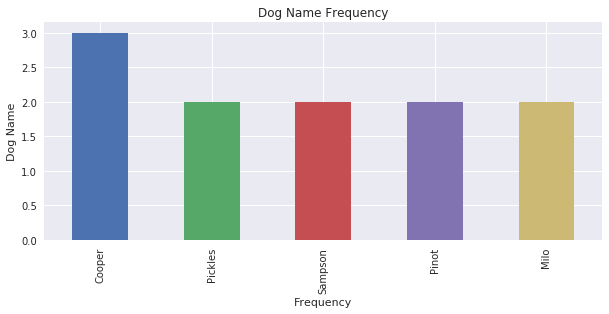

In [154]:
# Plot the top 5 Dog names by frequency

plt.figure(figsize=(10, 4))
dogname = combined_archive.name.value_counts().nlargest(5).plot(kind = 'bar');
dogname.set_title('Dog Name Frequency');
dogname.set_xlabel('Frequency');
dogname.set_ylabel('Dog Name');

In [155]:
#test

combined_archive.name.value_counts()

Cooper      3
Pickles     2
Sampson     2
Pinot       2
Milo        2
Dido        2
Maggie      2
Chuckles    2
Gus         2
Bones       2
Oliver      2
Bo          2
Loki        2
Kawhi       1
Smiley      1
Doobert     1
Winston     1
Betty       1
Gerbald     1
Benji       1
Moose       1
Lily        1
Deacon      1
Ollie       1
Sunny       1
Mimosa      1
Rooney      1
Craig       1
Lenox       1
Doc         1
           ..
Pilot       1
Raymond     1
Bayley      1
Jamesy      1
Petrick     1
Albert      1
Meera       1
Rhino       1
Rover       1
Scooter     1
Blu         1
Gidget      1
Shikha      1
Lorenzo     1
Huck        1
Scott       1
Bella       1
Chet        1
Kellogg     1
Miguel      1
Astrid      1
Napolean    1
Jazz        1
Kyle        1
Divine      1
Snoopy      1
Kaiya       1
Rocky       1
Eve         1
Stuart      1
Name: name, Length: 167, dtype: int64

After dropping the 'no-name' rows from the name columns, The Cooper had the highest frequency with 3

### INSIGHT 3

TOP 20 DOG NAMES WITH RETWEETS RAT

In [156]:
#Bring out the two columns needed

combined_archive[["name","retweet_count"]].head(20)

,name,retweet_count
9,Cassie,6101.0
37,Yogi,2506.0
90,Napolean,2941.0
99,Scout,2640.0
190,Barney,10406.0
195,Mimosa,1622.0
234,Meera,4271.0
256,Rhino,2026.0
262,Smiley,2149.0
263,Miguel,4308.0


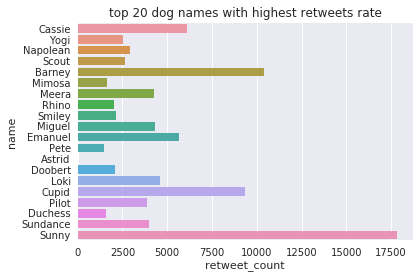

In [157]:
#Plot name to retweet count

sns.barplot(y="name", x="retweet_count", data = combined_archive[:20]).set_title('top 20 dog names with highest retweets rate');

After visuslizaion, the Sunny has the highest retweet count with value 21794.0, Barney took the second highest with value 13076.0 followed by the third runner up cupid with value 11878.0

### INSIGHT 4

DOG BREED WITH HIGHEST MEAN RATE NUMERATOR, AND HIGHEST VALUE COUNTS

In [158]:
# Find the dog breed with the highest numerator

combined_archive.groupby('p1')['rating_numerator'].mean().nlargest(10)

p1
clumber                   27.0
bedlington_terrier        14.0
irish_setter              14.0
pedestal                  14.0
prison                    14.0
standard_poodle           14.0
borzoi                    13.0
curly-coated_retriever    13.0
dandie_dinmont            13.0
italian_greyhound         13.0
Name: rating_numerator, dtype: float64

In [159]:
# Dog breed with highest value counts of p1

combined_archive.p1.value_counts()

golden_retriever                  15
pembroke                           6
labrador_retriever                 6
pomeranian                         6
german_shepherd                    5
porcupine                          5
pug                                5
eskimo_dog                         4
border_collie                      4
chihuahua                          4
staffordshire_bullterrier          3
toy_poodle                         3
lakeland_terrier                   3
siberian_husky                     3
dalmatian                          3
chow                               3
french_bulldog                     3
boxer                              3
miniature_pinscher                 3
cocker_spaniel                     3
blenheim_spaniel                   2
bernese_mountain_dog               2
great_pyrenees                     2
siamese_cat                        2
whippet                            2
american_staffordshire_terrier     2
wombat                             2
o

The dog breeds are classified into P1,P2,P3 respectively and by so doing, i checked the dog with the highest 10 numerators using their mean count, The clumber of the P1 had a wide distance from the others with 27.0 mean rating numerator as well as the golden_retriever appeared more than the others with count 15

In [160]:
# Find the dog breed with the highest numerator

combined_archive.groupby('p2')['rating_numerator'].mean().nlargest(10)

p2
fountain                     14.000000
ice_bear                     14.000000
palace                       14.000000
vizsla                       14.000000
cocker_spaniel               13.428571
maltese_dog                  13.000000
staffordshire_bullterrier    13.000000
whippet                      13.000000
wire-haired_fox_terrier      13.000000
malinois                     12.500000
Name: rating_numerator, dtype: float64

In [161]:
# Dog breed with highest value counts of p2

combined_archive.p2.value_counts()

labrador_retriever                11
cocker_spaniel                     7
french_bulldog                     6
chesapeake_bay_retriever           5
golden_retriever                   5
shetland_sheepdog                  5
boston_bull                        5
chihuahua                          4
siberian_husky                     4
collie                             4
kelpie                             3
norwegian_elkhound                 3
miniature_poodle                   3
toy_poodle                         3
leonberg                           3
tibetan_mastiff                    3
eskimo_dog                         3
cardigan                           3
flat-coated_retriever              3
chow                               3
doormat                            2
shih-tzu                           2
american_staffordshire_terrier     2
redbone                            2
samoyed                            2
schipperke                         2
english_setter                     2
b

I checked the dog breed in p2 with the highest 10 numerators using their mean count, The fountain, ice_bear, palace and vizsla are of point 14.0 mean rating numerator as well as the labrador_retriever appeared more than the others with count 11

In [162]:
# Find the dog breed with the highest numerator

combined_archive.groupby('p3')['rating_numerator'].mean().nlargest(10)

p3
lhasa                  16.666667
brass                  14.000000
umbrella               14.000000
english_setter         13.000000
ibizan_hound           13.000000
irish_water_spaniel    13.000000
newfoundland           13.000000
norfolk_terrier        13.000000
redbone                13.000000
saluki                 13.000000
Name: rating_numerator, dtype: float64

In [163]:
# Dog breed with highest value counts of p3

combined_archive.p3.value_counts()

malamute                          7
kelpie                            6
pug                               5
labrador_retriever                5
chesapeake_bay_retriever          4
echidna                           4
siamese_cat                       4
kuvasz                            4
chihuahua                         4
pembroke                          4
chow                              3
maltese_dog                       3
norwegian_elkhound                3
pekinese                          3
lhasa                             3
french_bulldog                    3
bull_mastiff                      3
golden_retriever                  3
tibetan_terrier                   3
vizsla                            2
toy_terrier                       2
irish_water_spaniel               2
saluki                            2
collie                            2
brittany_spaniel                  2
beagle                            2
german_shepherd                   2
shetland_sheepdog           

I also checked the dog breed in p3 with the highest 10 numerators using their mean count, The lhasa has 16.7 mean rating numerator as well as the malamute appeared more than the others with count 7